
## 1. Cargar datos
¿Todos saben qué es el formato JSON?

https://javaee.github.io/tutorial/jsonp001.html#:~:text=JSON%20defines%20only%20two%20data,true%2C%20false%2C%20and%20null.&text=When%20objects%20and%20arrays%20contain,has%20a%20tree%2Dlike%20structure.

Buscar ejemplos

In [ ]:
#!pip install nltk

In [7]:
import itertools

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import nltk

# Esto sirve para configurar NLTK. La primera vez puede tardar un poco
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\moreno\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\moreno\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
%ls ..\data\original

 El volumen de la unidad C no tiene etiqueta.
 El n£mero de serie del volumen es: 94BF-37C1

 Directorio de C:\Users\moreno\Documents\repos\DS-ONLINE-57\02-nlp\data\original

19/03/2021  19:43    <DIR>          .
19/03/2021  19:43    <DIR>          ..
19/03/2021  19:43         5.616.830 Sarcasm_Headlines_Dataset.json
19/03/2021  19:43         6.057.046 Sarcasm_Headlines_Dataset_v2.json
               2 archivos     11.673.876 bytes
               2 dirs  159.186.092.032 bytes libres


In [9]:
path_data = "..\\data\\original\\"

In [10]:
dataset = pd.read_json(path_data +'Sarcasm_Headlines_Dataset.json', lines= True)
dataset.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


In [11]:
dataset.shape

(26709, 3)

### variable target

In [12]:
#sns.countplot(¿Que es interesante para ver en un countplot)
#plt.show()

## Elegir una instancia al azar


In [13]:
#usar np.random.randint(menor valor, high = mayor valor)
# ¿Que hacia iloc?
#ver solo la columna del titulo
#ver el valor del index y el titulo

In [14]:
#manera menos fancy
dataset.headline[800]

'new details emerge in forgotten murder that snared attorney, highway patrolmen'

# Pipeline NLTK

* 1- Tokenizar
    * a- oraciones
    * b- palabras
* 2- ¿que son las stopwords?
* 3- ¿Que es un list comprehension?



In [10]:
# nltk.tokenize.sent_tokenize

In [ ]:
#nltk.tokenize.word_tokenize

In [11]:
# nltk.corpus.stopwords.words('english')

In [12]:
#list comprehension para filtrar
# palabra for palabra in array_palabras if palabra not in stopwords

### Frecuencia de palabras. 
¿Tiene sentido para el significado?
###nltk.FreqDist

### Dataset headlines

Analisis exploratorio

1. Tipo de titulares
2. Crear una lista vacia y agregar en esa lista todos los titulares (por tipo/dataframe creado) ya tokenizados (usar el `RegexpTokenizer`) y filtrado por `stopwords`.
3. Usar el `FreqDist` en esa lista que acaban de llenar. Llevar lo que devuelve `FreqDist` a un Dataframe. Ordenar por frecuencia en que aparece cada palabra.
4. Hacer un `barplot` o similar para visualizar.
5. ¿Qué palabras filtrarían, aparte de las que aparecen en `stopwords`? Crear una lista vacía y agregarlas a mano. Agregar en el código que realizaron una línea (similar a la que usan con `stopwords`) para que también filtre por esas palabras.
6. Volver a visualizar.


In [18]:
#podemos apendear una lista vacia donde tengamos palabras filtradas como nuestras stopwords 
filtrar = []
if True:
    filtrar.append("u")
    filtrar.append("new")

In [19]:
filtrar

['u', 'new']

In [13]:
dataset_no_sarcasmo = dataset[dataset.is_sarcastic==0]
dataset_no_sarcasmo.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0
5,https://www.huffingtonpost.com/entry/advancing...,advancing the world's women,0
6,https://www.huffingtonpost.com/entry/how-meat-...,the fascinating case for eating lab-grown meat,0


# Normalizacion

### Stopwords

In [16]:
stopwords = nltk.corpus.stopwords.words('english')
stopwords = [palabra for palabra in stopwords if 'not' not in palabra]

In [20]:
# aca vamos a separar 
todos_titulares_no_sarcasmo = []
for i in range(dataset_no_sarcasmo.shape[0]):
    titular = dataset_no_sarcasmo.iloc[i].headline
    titular = nltk.tokenize.RegexpTokenizer("[\w]+").tokenize(titular)
    titular = [word for word in titular if word not in stopwords]
    titular = [word for word in titular if word not in filtrar]

    todos_titulares_no_sarcasmo.append(titular)

In [21]:
filtrar

['u', 'new']

In [22]:
todos_titulares_no_sarcasmo = list(itertools.chain(*todos_titulares_no_sarcasmo))
todos_titulares_no_sarcasmo[0:10]

['former',
 'versace',
 'store',
 'clerk',
 'sues',
 'secret',
 'black',
 'code',
 'minority',
 'shoppers']

In [23]:
freq_no_sarcasmo = nltk.FreqDist(todos_titulares_no_sarcasmo)
#freq_no_sarcasmo

In [24]:
df_no_sarcasmo = pd.DataFrame(list(freq_no_sarcasmo.items()), columns = ["Word","Frequency"])
df_no_sarcasmo.head()

,Word,Frequency
0,former,82
1,versace,1
2,store,14
3,clerk,5
4,sues,15


In [25]:
df_no_sarcasmo.sort_values('Frequency',ascending=False, inplace = True)
df_no_sarcasmo.head()

,Word,Frequency
46,trump,1446
229,donald,458
498,not,387
421,says,349
29,women,317


In [26]:
df_no_sarcasmo.reset_index(drop = True, inplace=True)
df_no_sarcasmo.head()

,Word,Frequency
0,trump,1446
1,donald,458
2,not,387
3,says,349
4,women,317


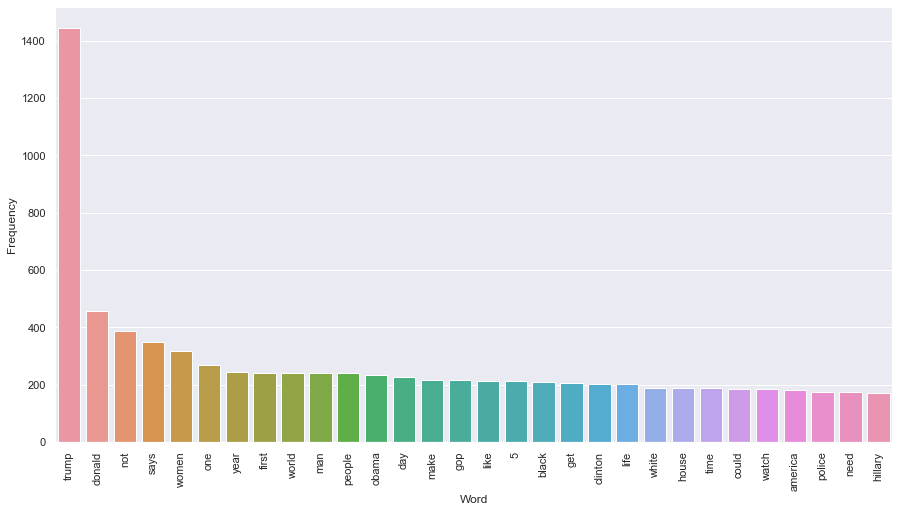

In [27]:
plt.figure(figsize = (15,8))
plot = sns.barplot(x  = df_no_sarcasmo.iloc[:30].Word, y = df_no_sarcasmo.iloc[:30].Frequency)
for item in plot.get_xticklabels():
    item.set_rotation(90)
plt.show()

In [28]:
dataset_sarcasmo = dataset[dataset.is_sarcastic==1]
dataset_sarcasmo.head()

,article_link,headline,is_sarcastic
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
8,https://politics.theonion.com/top-snake-handle...,top snake handler leaves sinking huckabee camp...,1
15,https://entertainment.theonion.com/nuclear-bom...,nuclear bomb detonates during rehearsal for 's...,1
16,https://www.theonion.com/cosby-lawyer-asks-why...,cosby lawyer asks why accusers didn't come for...,1


### Regex, saco lo que no son palabras



In [29]:
todos_titulares_sarcasmo = []
for i in range(dataset_sarcasmo.shape[0]):
    titular = dataset_sarcasmo.iloc[i].headline
    titular = nltk.tokenize.RegexpTokenizer("[\w]+").tokenize(titular)
    titular = [word for word in titular if word not in stopwords]
    titular = [word for word in titular if word not in filtrar]
    todos_titulares_sarcasmo.append(titular)

In [31]:
todos_titulares_sarcasmo = list(itertools.chain(*todos_titulares_sarcasmo))
todos_titulares_sarcasmo[0:10]

['mom',
 'starting',
 'fear',
 'son',
 'web',
 'series',
 'closest',
 'thing',
 'grandchild',
 'boehner']

In [ ]:
#freq_sarcasmo = nltk.FreqDist(todos_titulares_sarcasmo)
#freq_sarcasmo

## 4. Stemming
Progamando, programar, programo

 "STEMMING" recorta la terminación de las palabras, agrupándolas por su raiz. 

## dropeo nan

In [ ]:
# Recorremos todos los titulos y le vamos aplicando la Normalizacion y luega el Stemming a cada uno [^a-zA-Z0-9_].
titular_list=[]
#para titular en la columna de los titulares
    # Vamos a reemplzar los caracteres que no sean letras por espacios
    titular=re.sub("COMPLETAR EL REGEX"," ",str(titular))
    # Pasamos todo a minúsculas
    titular=titular.PASARAMINUSCULAS
    # Tokenizamos para separar las palabras del titular
    titular=TOKENIZARELTITULAR
    # Eliminamos las palabras de menos de 3 letras
    titular = Listcomprejension: palabras en el titular si son las palabras son mas de 3 


    # Sacamos las Stopwords
    #titular = [palabra for palabra in titular if not palabra in stopwords]
    
    ## Hasta acá Normalizamos, ahora a stemmizar
    
    # Aplicamos la funcion para buscar la raiz de las palabras
    titular=[stemmer.stem(palabra) for palabra in titular]
    # Por ultimo volvemos a unir el titular
    titular=" ".join(titular)
    
    # Vamos armando una lista con todos los titulares
    titular_list.append(titular)
    #dataset["titular_normalizado"] = titular_list

 Agregamos al dataset una columna llamado `titular_stem` que contenga los titulares stemmizados

In [ ]:
dataset["titular_stem"] = titular_list
dataset.tail(

 Armamos un nuevo dataset llamado `dataset_stem` que contenga solo las columnas `titular_stem` e `is_sarcastic`

In [ ]:
dataset_stem=pd.concat([dataset.titular_stem,dataset.is_sarcastic],axis=1)
dataset_stem.dropna(axis=0,inplace=True)  # Por si quedaron titulares vacios
dataset_stem.head()

## 5. Lemmatization

Levar las palabras a la raiz. Went y go en inglés tienen la misma raíz. Para esto la librería intenta identificar si es un verbo, un sustantivo, etc

Para usar las funciones que ofrece nltk para lemmantizar, tendremos primero que descargar la libreria Wordnet que se encuentra en la solapa 'corpora' y las librerias 'maxenttreebank_pos' y 'averaged_perceptron_tagger' que se encuentra en la solapa 'Models'. Para eso ejecute la siguiente celda:

In [ ]:
#nltk.download()

In [ ]:
# Importamos esta libreria que nos permite reemplzar caracteres
import re

# Importamos el lemmatizar de NLTK, y creamos el objeto
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

In [ ]:
# Oracion que usaremos como ejemplo
frase = "He was running and eating at same time. He has bad habit of swimming after playing long hours in the Sun."

# Hay que regularizar el texto. Dejar solo letra, pasar a minúsculas y tokenizar:

# Sacamos todo lo que no sean letras
frase = re.sub("[^a-zA-Z]"," ",str(frase))
# Pasamos a minúsculas
frase = frase.lower()
# Tokenizamos
frase_tokens = nltk.word_tokenize(frase)

# Veamos como cambians las palabras al lemmatizar
print("{0:20}{1:20}".format("Word","Lemma"))
for palabra in frase_tokens:
    print ("{0:20}{1:20}".format(palabra,wordnet_lemmatizer.lemmatize(palabra)))

In [ ]:
print(nltk.pos_tag(frase_tokens))